<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Xander Gallegos, Carlos Emiliano Rodríguez Núñez.

**Fecha:** 15 de febrero del 2024.

**Expediente** : 737989, 738288.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: <a href=https://github.com/xagallegos/ProyectoConjunto_XGallegos_CERodriguez>ProyectoConjunto_XGallegos_CERodriguez</a>

# Tarea 3: Clase 7 

## Enunciado de tarea 

> Condensar todos los procedimientos realizados en esta clase donde se implementen los métodos necesarios para crear un correcto flujo de lectura de datos, análisis, ajuste de parámetros, predicción y métricas de errores para un conjunto de datos dado.

> Implementar los métodos y las lógicas que consideren pertinentes, como de igual forma las posibles variables a introducir en el constructor de la clase. Posteriormente, utilizar la clase anteriormente creada para generar un modelo SARIMAX para el siguiente conjunto de datos: <https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true>

### Ejercicio 1: Condensar todos los procedimientos realizados en esta clase donde se implementen los métodos necesarios para crear un correcto flujo de lectura de datos, análisis, ajuste de parámetros, predicción y métricas de errores para un conjunto de datos dado.

Código de solución estudiante 1

In [1]:
# Código de solución estudiante 1

Código de solución estudiante 2

In [2]:
# Código de solución estudiante 2

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import MSTL
import itertools
from sklearn.preprocessing import power_transform
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

import warnings
warnings.filterwarnings("ignore")

class timeseries:
    
    def __init__(self, data):
        self.data = data

    def set_time_seties(self, target, dateColumn = 'date'):
        timeseries = self.data[[dateColumn, target]]
        timeseries.columns = ['date', 'y']
        timeseries['date'] = pd.to_datetime(timeseries['date'])
        timeseries = timeseries.set_index('date').resample('M').mean()
        self.timeseries = timeseries
        self.use_param = timeseries
        return self.timeseries.tail()

    def set_time_series_slice(self, fraction = 1000):
        self.slice = fraction
        self.fraction = self.timeseries[:fraction]
        self.use_param = self.fraction

    def plot_ts(self):
        return self.use_param.plot()

    def adf_test(self, self_param = True, extra = ''):
        print("Results of Dickey-Fuller Test:")
        if self_param:
            series = self.timeseries
        else:
            series = extra
        dftest = adfuller(series, autolag="AIC")
        dfoutput = pd.Series(
            dftest[0:4],
            index=["Test Statistic", "p-value",
                "#Lags Used", "Number of Observations Used",],)
        
        for key, value in dftest[4].items():
            dfoutput["Critical Value (%s)" % key] = value
        print(dfoutput)
        if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
            print("\u001b[32mStationary\u001b[0m")
        else:
            print("\x1b[31mNon-stationary\x1b[0m")

    def plot_acf_pacf(self, withDiff = 0, kwargs={'lags' : 40}, self_param = True, extra = ''):

        f = plt.figure(figsize=(10,8))
        if self_param:
            series = self.use_param
        else:
            series = extra
        for _ in range(withDiff):
            series = series.diff().dropna()
            
        ax1 = f.add_subplot(121)
        plot_acf(series, zero=False, ax=ax1, **kwargs)
        ax2 = f.add_subplot(122)
        plot_pacf(series, zero=False, ax=ax2, method='ols', **kwargs)
        plt.show()

    def season_decomp(self, seasons):

        self.seasons = seasons
        data1 = self.timeseries.copy()
        periods_seasons = self.seasons
        stl_kwargs = {"seasonal_deg": 0} 
        modelo = MSTL(data1, periods=periods_seasons, stl_kwargs=stl_kwargs)
        res2 = modelo.fit()
        self.res2 = res2
        
        fig, ax = plt.subplots(5, 1, sharex=True, figsize=(8, 8))
        res2.observed.plot(ax=ax[0])
        ax[0].set_ylabel('Observed')
        res2.trend.plot(ax=ax[1])
        ax[1].set_ylabel('Trend')
        res2.seasonal[f'seasonal_{periods_seasons[0]}'].plot(ax=ax[2])
        ax[2].set_ylabel(f'seasonal_{periods_seasons[0]}')
        res2.seasonal[f'seasonal_{periods_seasons[1]}'].plot(ax=ax[3])
        ax[3].set_ylabel(f'seasonal_{periods_seasons[1]}')
        res2.resid.plot(ax=ax[4])
        ax[4].set_ylabel('Residual')
        fig.tight_layout()
        ax = res2.observed.to_frame('observados')[:self.slice].plot()
        res2.seasonal[:self.slice].plot(ax = ax)

    def stationarity(self):
        j = {}
        for i in self.seasons:
            h = f'seasonal_{i}'
            print(h)
            j[h] = self.res2.seasonal[h]
            self.adf_test(self_param = False, extra = j[h])
            print('Sin diferenciar')
            self.plot_acf_pacf(self_param = False, extra = j[h])
            print('Diferenciada')
            self.plot_acf_pacf(withDiff=1, self_param = False, extra = j[h])
            print('\n')
        self.j = j

    def non_stat_comp(self, seasons):
        self.adf_test(self_param=False, extra=self.res2.observed)
        non_seasonal = self.res2.observed - self.res2.seasonal[f'seasonal_{seasons}']
        non_seasonal.plot()
        
        self.adf_test(self_param=False, extra = non_seasonal)
        print('Sin diferenciar')
        self.plot_acf_pacf(self_param = False, extra = non_seasonal)
        print('Diferenciada')
        self.plot_acf_pacf(withDiff=1, self_param = False, extra = non_seasonal)
        print('Diferenciada 2 veces')
        self.plot_acf_pacf(withDiff=2, self_param = False, extra = non_seasonal)
        self.non_seasonal = non_seasonal
        self.chosenseasons = seasons

    def sarimax_param(self, p, d, q, P, D, Q, t=['n', 'c', 't', 'ct']):
        params_no_estacionales = list(itertools.product(p, d, q))
        params_estacionales = [(x[0], x[1], x[2], self.chosenseasons) for x in list(itertools.product(P, D, Q))]
        sarimax_params = list(itertools.product(params_no_estacionales, params_estacionales, t))
        self.sarimax_params = sarimax_params

    def scale_data(self):
        vals = power_transform(self.timeseries['y'].to_numpy().reshape(-1, 1), method='yeo-johnson')
        self.scaledData = vals
    
    def find_param(self):
        self.scale_data()
        resultados = pd.DataFrame(columns=['params', 'AIC', 'BIC', 'LLF'], index = np.arange(0, 11))
        # print(f'Trying out {len(self.sarimax_params)} posible combinations')
        i = 0
        for par_no_season, par_season, trend in self.sarimax_params:

            mod = SARIMAX(endog= self.scaledData, trend= trend,
                order= par_no_season, seasonal_order= par_season)
            results = mod.fit()
            
            # print(f'Model done for params: {par_no_season}, {par_season}, {trend}')
            resultados.loc[i, 'params'] = str((par_no_season, par_season, trend))
            resultados.loc[i, 'AIC'] = results.aic
            resultados.loc[i, 'BIC'] = results.bic
            resultados.loc[i, 'LLF'] = results.llf
            i += 1
        self.resultadosParams = resultados
        return self.resultadosParams

    def sarimax_model(self, no_season, season, trend):
        modelo = SARIMAX(
                endog= self.scaledData, trend= trend,
                order= no_season, seasonal_order= season,
                enforce_stationarity=False, enforce_invertibility=False)
        
        results = modelo.fit()
        self.sarimax = results
        return results.summary()

    def prediction(self, size):
        end = len(self.timeseries)
        start = end-size
        actual = self.scaledData[start:end]
        predicted = self.sarimax.predict(start = start+1, end = end, dynamic = True)
        actual = actual.reshape(size,)
        assert actual.shape == predicted.shape
        self.actual = actual
        self.predicted = predicted
        predictions = pd.DataFrame({'actual': actual, 'predicted': predicted}, index=self.timeseries.index[start:end])
        fig, ax = plt.subplots(figsize=(12,8))
        predictions.actual.plot(ax = ax)
        predictions.predicted.plot(ax =ax)
        ax.legend(labels = ['actual', 'forecast'])

    def calculate_mape(self) -> float:
        if not all([isinstance(self.actual, np.ndarray), isinstance(self.predicted, np.ndarray)]):
            self.actual, self.predicted = np.array(self.actual), np.array(self.predicted)
        self.mape =  round(np.mean(np.abs((self.actual - self.predicted) / self.actual)) * 100, 2)

    def calculate_mad(self) -> float:
        if not all([isinstance(self.actual, np.ndarray), isinstance(self.predicted, np.ndarray)]):
            self.actual, self.predicted = np.array(self.actual), np.array(self.predicted)
        self.mad =  round(np.mean(np.abs(self.actual - self.predicted)) * 100, 2)


### Ejercicio 2: Implementar los métodos y las lógicas que consideren pertinentes, como de igual forma las posibles variables a introducir en el constructor de la clase. Posteriormente, utilizar la clase anteriormente creada para generar un modelo SARIMAX para el siguiente conjunto de datos: <https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true>

Código de solución de estudiante 1

In [3]:
# Código de solución de estudiante 1

Código de solución de estudiante 2

In [4]:
# Código de solución de estudiante 2
url = 'https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true'
data = pd.read_excel(url)

df = data.copy()
df['date'] = df.apply(lambda x: x['date'] + pd.Timedelta(x['hour'], 'h'), axis = 1)
df.head()

,Unnamed: 0,date,year,month,day,hour,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,6,1990-01-01 06:00:00,1990,Jan,Mon,6,234,503,78,12.1406,9.7,498.632
1,7,1990-01-01 07:00:00,1990,Jan,Mon,7,448,723,91,13.3250,10.1,720.409
2,8,1990-01-01 08:00:00,1990,Jan,Mon,8,699,959,71,13.3094,9.3,946.154
3,9,1990-01-01 09:00:00,1990,Jan,Mon,9,880,1016,73,13.9375,9.1,987.273
4,10,1990-01-01 10:00:00,1990,Jan,Mon,10,1009,1031,85,14.1141,8.0,1000.230


Plot Time Series


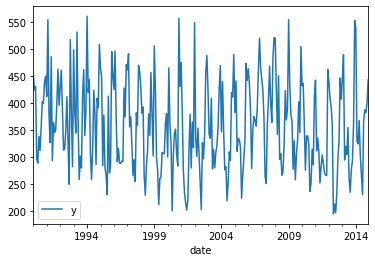

In [5]:
modelo = timeseries(df)
modelo.set_time_seties('Energy (kWh)')

print("Plot Time Series")
modelo.plot_ts();

Set Time Series Slice y Plot Acf Pacf


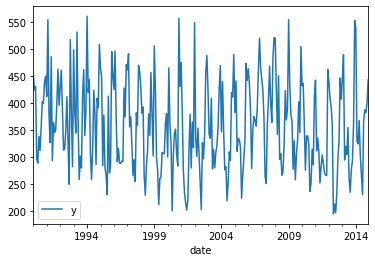

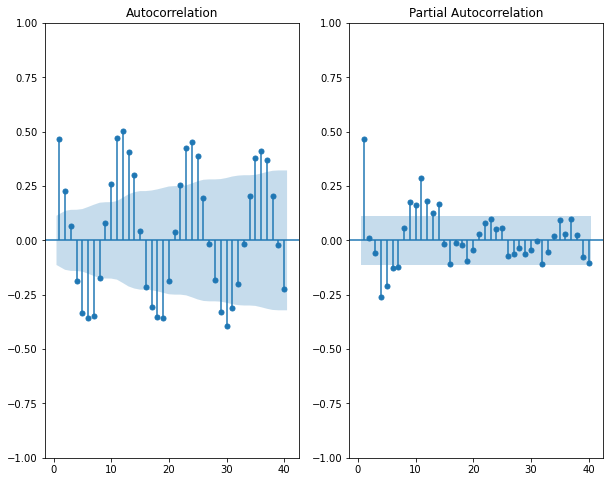

In [6]:
print("Set Time Series Slice y Plot Acf Pacf")
modelo.set_time_series_slice()
modelo.plot_ts()

modelo.plot_acf_pacf(kwargs={'lags': 40})

Plot Acf Pacf 1


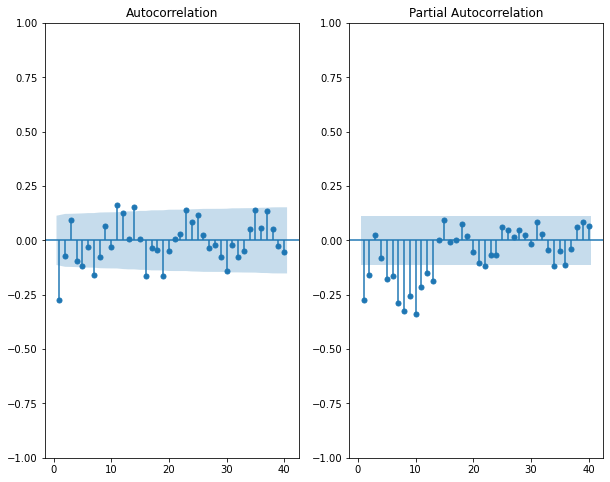

Seasonal Decompose


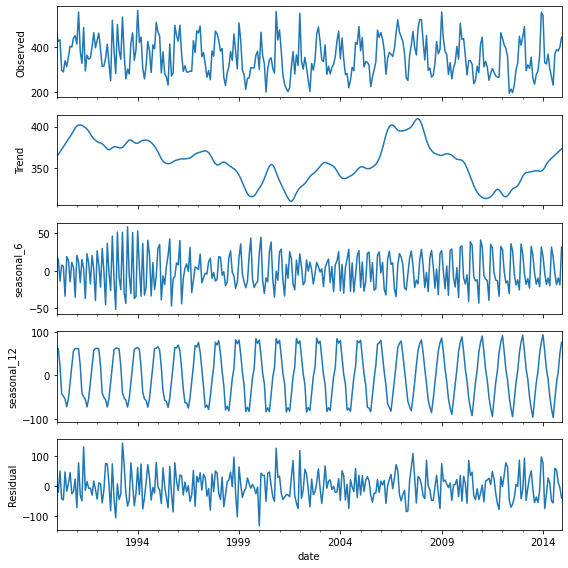

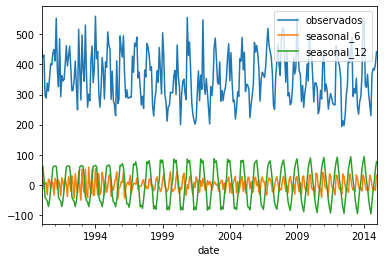

In [7]:
print("Plot Acf Pacf 1")
modelo.plot_acf_pacf(1, kwargs={'lags': 40})

print("Seasonal Decompose")
modelo.season_decomp((6, 12))

seasonal_6
Results of Dickey-Fuller Test:
Test Statistic                -9.451841e+00
p-value                        4.594080e-16
#Lags Used                     1.600000e+01
Number of Observations Used    2.830000e+02
Critical Value (1%)           -3.453670e+00
Critical Value (5%)           -2.871808e+00
Critical Value (10%)          -2.572241e+00
dtype: float64
Stationary
Sin diferenciar


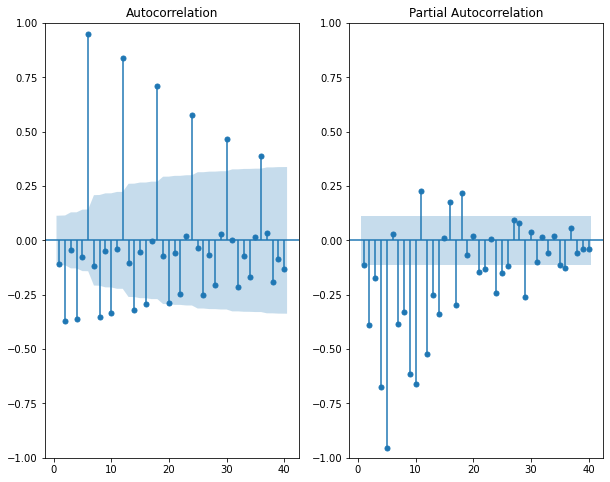

Diferenciada


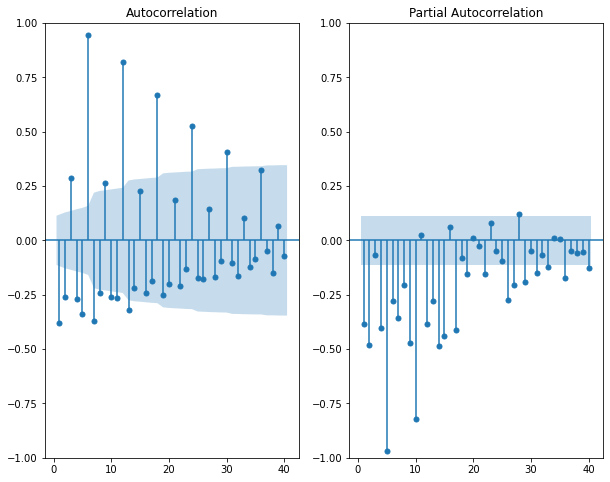



seasonal_12
Results of Dickey-Fuller Test:
Test Statistic                 -29.256349
p-value                          0.000000
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64
Stationary
Sin diferenciar


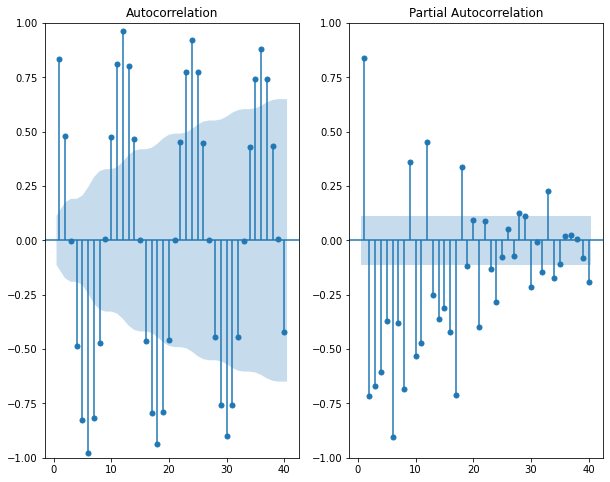

Diferenciada


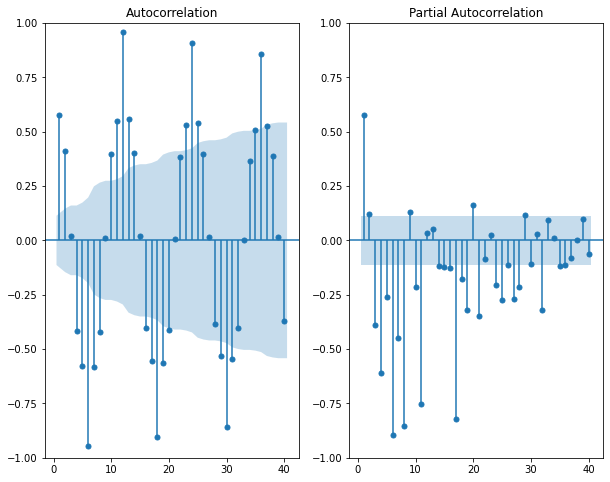

In [8]:
modelo.stationarity()

Results of Dickey-Fuller Test:
Test Statistic                  -2.242267
p-value                          0.191264
#Lags Used                      13.000000
Number of Observations Used    286.000000
Critical Value (1%)             -3.453423
Critical Value (5%)             -2.871699
Critical Value (10%)            -2.572183
dtype: float64
Non-stationary
Results of Dickey-Fuller Test:
Test Statistic                  -2.287739
p-value                          0.175953
#Lags Used                      15.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64
Non-stationary
Sin diferenciar


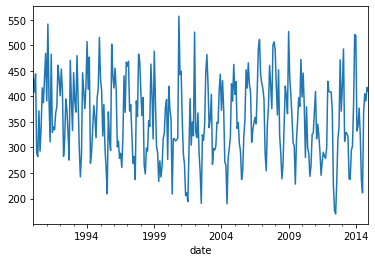

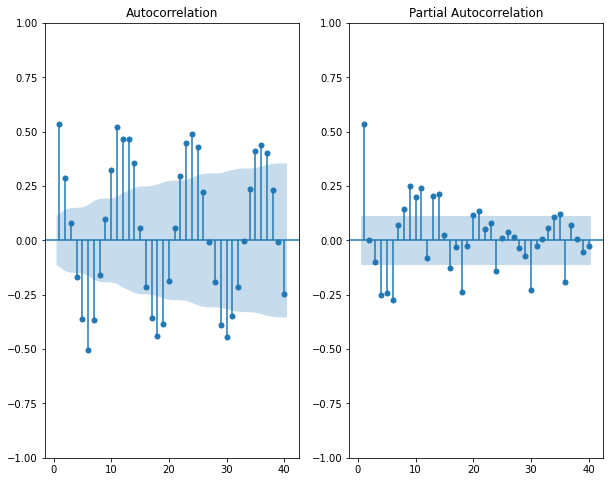

Diferenciada


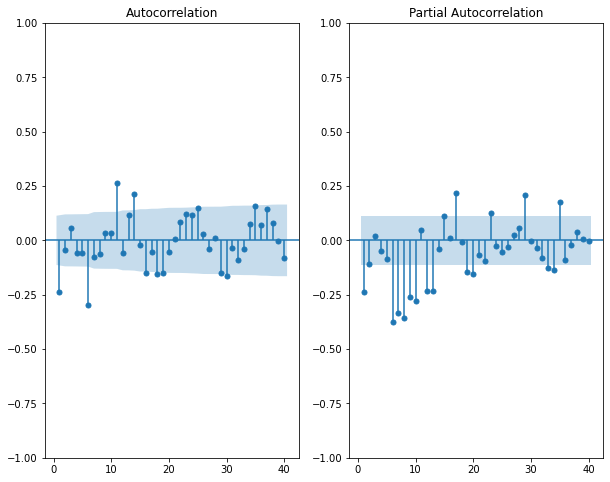

Diferenciada 2 veces


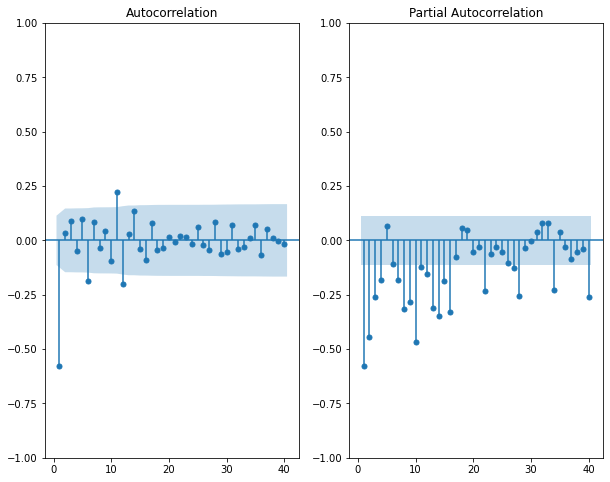

In [9]:
modelo.non_stat_comp(6)

Results of Dickey-Fuller Test:
Test Statistic                  -5.001408
p-value                          0.000022
#Lags Used                      16.000000
Number of Observations Used    282.000000
Critical Value (1%)             -3.453754
Critical Value (5%)             -2.871844
Critical Value (10%)            -2.572261
dtype: float64
Stationary


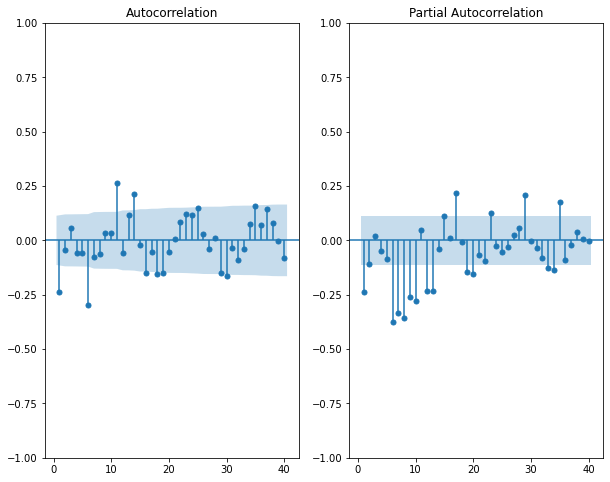

In [10]:
modelo.adf_test(False, modelo.non_seasonal.diff().dropna())
modelo.plot_acf_pacf(1, {'lags': 40}, False, modelo.non_seasonal)

In [17]:
p = [0, 1, 2]
d = [1]
q = [0, 1]
P = [0 ,1, 2]
D = [0]
Q = [0, 1, 2]
modelo.sarimax_param(p, d, q, P, D, Q)

posibleParams = modelo.find_param().sort_values(by=['AIC'], ascending=True);

In [18]:
posibleParams.head()

,params,AIC,BIC,LLF
196,"((2, 1, 1), (1, 0, 1, 6), 'n')",685.099963,707.302625,-336.549982
208,"((2, 1, 1), (2, 0, 1, 6), 'n')",686.686002,712.589107,-336.343001
200,"((2, 1, 1), (1, 0, 2, 6), 'n')",686.723048,712.626153,-336.361524
197,"((2, 1, 1), (1, 0, 1, 6), 'c')",686.900045,712.80315,-336.450022
140,"((1, 1, 1), (2, 0, 2, 6), 'n')",687.199031,713.102136,-336.599516


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35914D+00    |proj g|=  3.27667D-01

At iterate    5    f=  1.30337D+00    |proj g|=  7.49326D-02

At iterate   10    f=  1.22024D+00    |proj g|=  4.25510D-01

At iterate   15    f=  1.17738D+00    |proj g|=  8.51666D-02

At iterate   20    f=  1.12466D+00    |proj g|=  3.07914D-01

At iterate   25    f=  1.09776D+00    |proj g|=  2.90364D-01

At iterate   30    f=  1.09713D+00    |proj g|=  4.35460D-03

At iterate   35    f=  1.09712D+00    |proj g|=  5.74780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

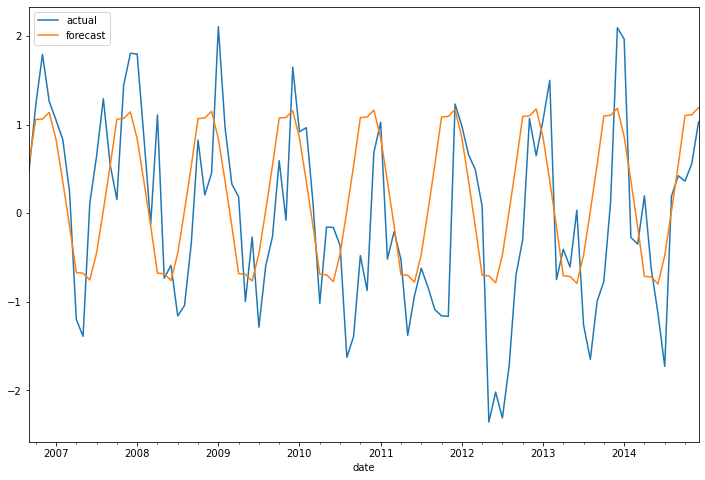

In [19]:
modelo.sarimax_model((2, 1, 1), (1, 0, 1, 6), 'n')
modelo.prediction(100)